In [15]:
#pip install nltk
#nltk.download()

In [8]:
import nltk

In [4]:
import pandas as pd

messages = pd.read_csv('/content/drive/MyDrive/Projects/Spam Classifier/SMSSpamCollection',
                       sep='\t',names = ['label','message'])

In [14]:
# cleaning the text
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

ps = PorterStemmer()
lm = WordNetLemmatizer()
corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [63]:
# creating bag of words and Tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)
x_cv = cv.fit_transform(corpus).toarray()
x_tfidf = tfidf.fit_transform(corpus).toarray()

In [64]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

## Using CountVectorizer

In [65]:
# train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_cv,y,test_size=0.2,random_state=0)

In [66]:
# training model using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB()
model_cv.fit(xtrain,ytrain)
ypred_cv= model_cv.predict(xtest) 

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_cv = accuracy_score(ypred_cv,ytest)
confusion_matrix_cv = confusion_matrix(ypred_cv,ytest)

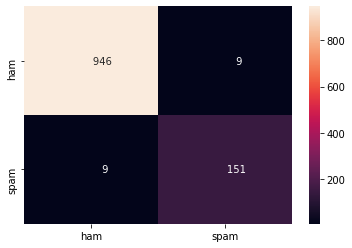

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix_cv,annot=True,fmt='10',xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.show()

In [68]:
accuracy_cv

0.9838565022421525

## Using TF-IFD Vectorizer

In [69]:

# train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_tfidf,y,test_size=0.2,random_state=0)

In [70]:
# training model using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
model_tfidf = MultinomialNB()
model_tfidf.fit(xtrain,ytrain)
ypred_tfidf= model_tfidf.predict(xtest) 

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_tfidf = accuracy_score(ypred_tfidf,ytest)
confusion_matrix_tfidf = confusion_matrix(ypred_tfidf,ytest)

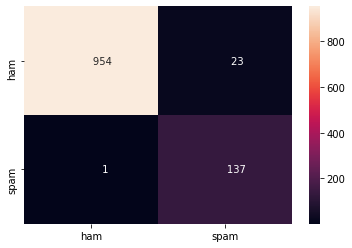

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix_tfidf,annot=True,fmt='10',xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.show()

In [72]:
accuracy_tfidf

0.97847533632287